### Map Reduce to Summarize Large Documents

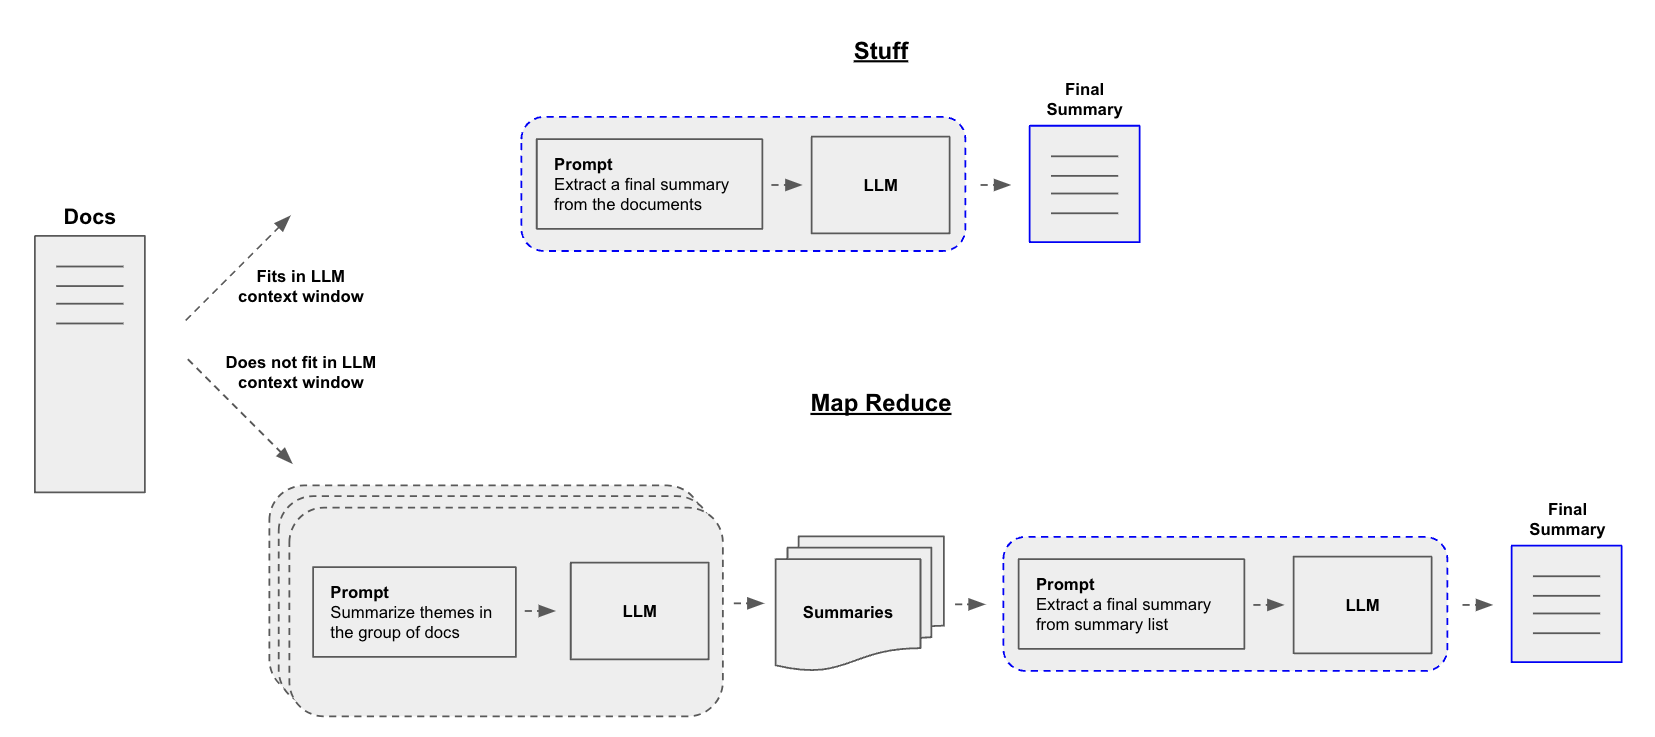

In [1]:
from langchain_groq import ChatGroq
from langchain_community.document_loaders import PyPDFLoader
import os
from dotenv import load_dotenv

load_dotenv()

groq_api_key = os.getenv('GROQ_API_KEY') # API Key

llm = ChatGroq(groq_api_key=groq_api_key, model_name='llama3-8b-8192')

load = PyPDFLoader('./data/apjspeech.pdf')

docs = load.load_and_split()

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

final_document = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100).split_documents(docs)
final_document

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': './data/apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the futur

In [4]:
len(final_document)

13

In [6]:
from langchain import PromptTemplate

chunk_prompts = """
Please summarize the below speech:
Speech: {text}
"""

map_prompt_template = PromptTemplate(input_variables=['text'], template=chunk_prompts)

In [7]:
final_prompt = """
Provide the final summary of the entire speech with these important points.
Add a motivational title, start the precise summary with an introduction and provide the summary in number points for the speech.
Speech: {text}
"""
final_prompt_template = PromptTemplate(input_variables=['text'], template=final_prompt)

In [8]:
from langchain.chains.summarize import load_summarize_chain

summary_chain = load_summarize_chain(llm=llm, chain_type="map_reduce", map_prompt=map_prompt_template, combine_prompt=final_prompt_template, verbose=True)

output = summary_chain.run(final_document)
output

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1840\3196584151.py:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = summary_chain.run(final_document)




> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have m

c:\Users\LENOVO\OneDrive\Desktop\Project\GenAI\LangChain\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Token indices sequence length is longer than the specified maximum sequence length for this model (2346 > 1024). Running this sequence through the model will result in indexing errors




> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a motivational title, start the precise summary with an introduction and provide the summary in number points for the speech.
Speech: The speech is a departing address by A.P.J. Abdul Kalam, the former President of India, to the nation and its people. He expresses gratitude for the opportunity to serve the country for five years and shares his experiences and lessons learned during his tenure.

Kalam highlights ten important messages that he wants to convey to the nation, which are:

1. Accelerate development: He emphasizes the importance of fulfilling the aspirations of the youth.
2. Empower villages: He stresses the need to empower rural areas and villages.
3. Mobilize rural core competence for competitiveness: He encourages the use of rural skills and resources to enhance competitiveness.
4. Seed to Food: He highlights the importance of agricul

'**Motivational Title:** "Empowering India: A Vision for a Developed Nation 2020"\n\n**Precise Summary in Number Points:**\n\n**Introduction:**\nDr. A.P.J. Abdul Kalam, the former President of India, delivers a departing address to the nation, expressing gratitude for the opportunity to serve and sharing his experiences and lessons learned during his tenure.\n\n**Ten Important Messages:**\n\n1. Accelerate development: Fulfill the aspirations of the youth.\n2. Empower villages: Develop rural areas and villages.\n3. Mobilize rural core competence for competitiveness: Utilize rural skills and resources for competitiveness.\n4. Seed to Food: Ensure availability of seeds to produce food.\n5. Defeat problems and succeed: Overcome challenges and achieve success.\n6. Overcome problems through partnership: Collaborate to overcome problems.\n7. Courage in combating calamities: Show courage and resilience in the face of natural disasters.\n8. Connectivity for societal transformation: Develop infr